In this exercise goal is to demonstrate experimental probablity of receiving 6's while rolling the dice. 

For one try, chance to receive 6 is 1/6 which is 0.1666666666666667.

### **What I want to check here is**:

#### 1) How will n number of tries affect experimental probablity to receive number 6?


#### 2) What is the probability of rolling at least one 6 in n rolls?

---

**1. for n number of tries i will use logspace to make huge amount of tries.**

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rnd= np.random.default_rng(seed=100)

In [299]:
exp_prob_df = pd.DataFrame(columns=('rolling','six','exp_prob'))
dice = [1,2,3,4,5,6]
rolling = np.logspace(1.75, 7, 100, dtype=int)
six = []

for n_rolls in rolling:
    dice_roll = rnd.choice(dice,size=n_rolls)
    result = np.unique(dice_roll,return_counts=True)
    no_6 = result[1][-1]
    six.append(no_6)
six = np.asarray(six)

exp_prob_df['rolling']=rolling
exp_prob_df['six']=six
exp_prob_df['exp_prob']=np.round(six/rolling,5)

 
print(exp_prob_df.to_markdown())


|    |          rolling |              six |   exp_prob |
|---:|-----------------:|-----------------:|-----------:|
|  0 |     56           |      8           |    0.14286 |
|  1 |     63           |     18           |    0.28571 |
|  2 |     71           |      7           |    0.09859 |
|  3 |     81           |     15           |    0.18519 |
|  4 |     91           |     20           |    0.21978 |
|  5 |    103           |     16           |    0.15534 |
|  6 |    116           |     15           |    0.12931 |
|  7 |    132           |     16           |    0.12121 |
|  8 |    149           |     21           |    0.14094 |
|  9 |    168           |     31           |    0.18452 |
| 10 |    190           |     34           |    0.17895 |
| 11 |    215           |     37           |    0.17209 |
| 12 |    243           |     35           |    0.14403 |
| 13 |    275           |     45           |    0.16364 |
| 14 |    310           |     53           |    0.17097 |
| 15 |    351 

Lets plot it.

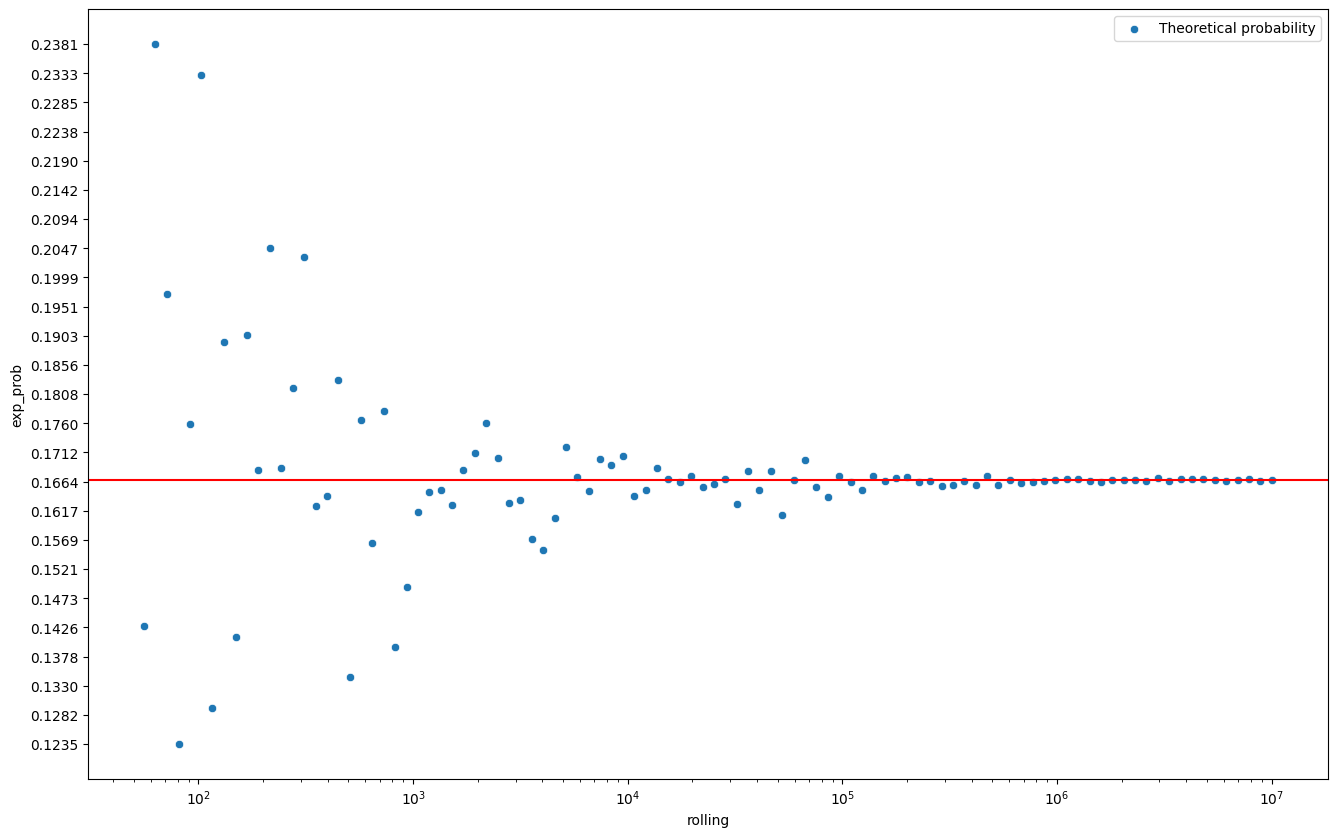

In [298]:

fig, ax = plt.subplots(figsize=(16, 10))
sns.scatterplot(data=exp_prob_df,x='rolling' ,y='exp_prob', marker='o',label='Theoretical probability')
ax.set_yticks(np.linspace(exp_prob_df['exp_prob'].min(),(exp_prob_df['exp_prob'].max()),25))
ax.set_xscale('log')
ax.axhline( 0.16674,c='r', label='Experimental Probability')

### I concluded the following:

> after simulating the dice rolling of 10^7 (logspace) it is clear that:

## 1. Theoretical probability (1/6 ~ 0.167777) is the same as experimental probability `0.16679`

## 2. From the scatterplot above we see how the values of ratio $\frac{n_{\rm HITS}}{N_{\rm TRIES}}$ converge towards the predicted theoretical probability of 16.666...% as $N_{\rm TRIES}\rightarrow\infty$.

### This confirm the theory: Law of Large Numbers

> The more trials performed, the closer the experimental probability gets to the theoretical probability.